$$\text{RFM Model}$$

### What is RFM Model?

> Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by measuring and analyzing spending habits. - *Investopedia*

> RFM stands for Recency, Frequency, and Monetary value, three variables used for behavioral segmentation. Based on RFM variables or RFM metrics, companies can segment their customer base, identify their best and high potential customers, create better experiences and offers to keep them close and happy. - *Ominiconvert*

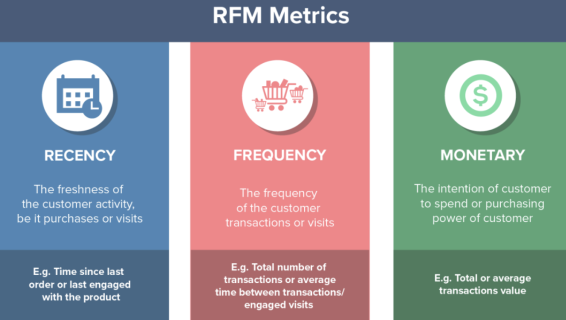

RFM分析是$\color{crimson}{\bf{\text{Recency}}}$, $\color{crimson}{\bf{\text{Frequency}}}$, $\color{crimson}{\bf{\text{Monetary}}}$ 三个英文单词的缩写。Recency检查用户消费的时间近度、Frequency检验用户消费的频率、而Monetary检验用户消费的总价值。企业通常运用RFM模型，根据顾客的消费行为将顾客进行分层，从而识别出最具价值/潜力的消费者。

### How to understand the three metrics?

RFM模型主要基于三个指标衡量顾客的消费行为：

- Recency: How recently a customer has bought a product
- Frequency: How often a customer makes a purchase
- Monetary: How much money a cusotmer spends on purchases

为了基于RFM模型将顾客进行分层，我们需要给这三个指标设定一个数值范围。根据所读文章，每一个指标都应该被设置在1-5的分数范围内（分数越高越好）。最佳顾客是那些在三个指标中都是最高分的人。

**Recency**

顾客购买的时间越近，则该顾客产生复购行为的概率越高。顾客购买的时间近度可以给营销活动提供信息以刺激消费者再次产生交易行为。

**Frequency**

顾客交易的时间频率越高，则说明顾客可能越投入和满意。顾客交易的频率被影响的因素很多，包括产品的类型、产品的价格、和产品替换或者更新的需求。如果顾客的购买周期可以被预测，则可以精准地开展营销活动刺激消费者购买商品。

**Monetary**

金钱价值可以用来区分重度消费者和轻度消费者。企业应该将营销的重点聚焦于花费高的消费者。

### Why is RFM Model Useful?

> The recency, frequency, monetary value (RFM) model is based on three quantitative factors namely recency, frequency, and monetary value. Each customer is ranked in each of these categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The higher the customer ranking, the more likely it is that they will do business again with a firm. Essentially, the RFM model corroborates the marketing adage that "80% of business comes from 20% of the customers." - Invetopedia

RFM分析可以帮助我们利用消费者的历史行为数据更加清晰的认知消费者行为。通过RFM，我们可以：
- Identify groups of customers
- Target them for campaigns
- Promote repeat purchase and loyalty
- Defend against attrition/defection
- Acquire customers who resemble the best ones

### Comparison between Predictive Model and RFM Model

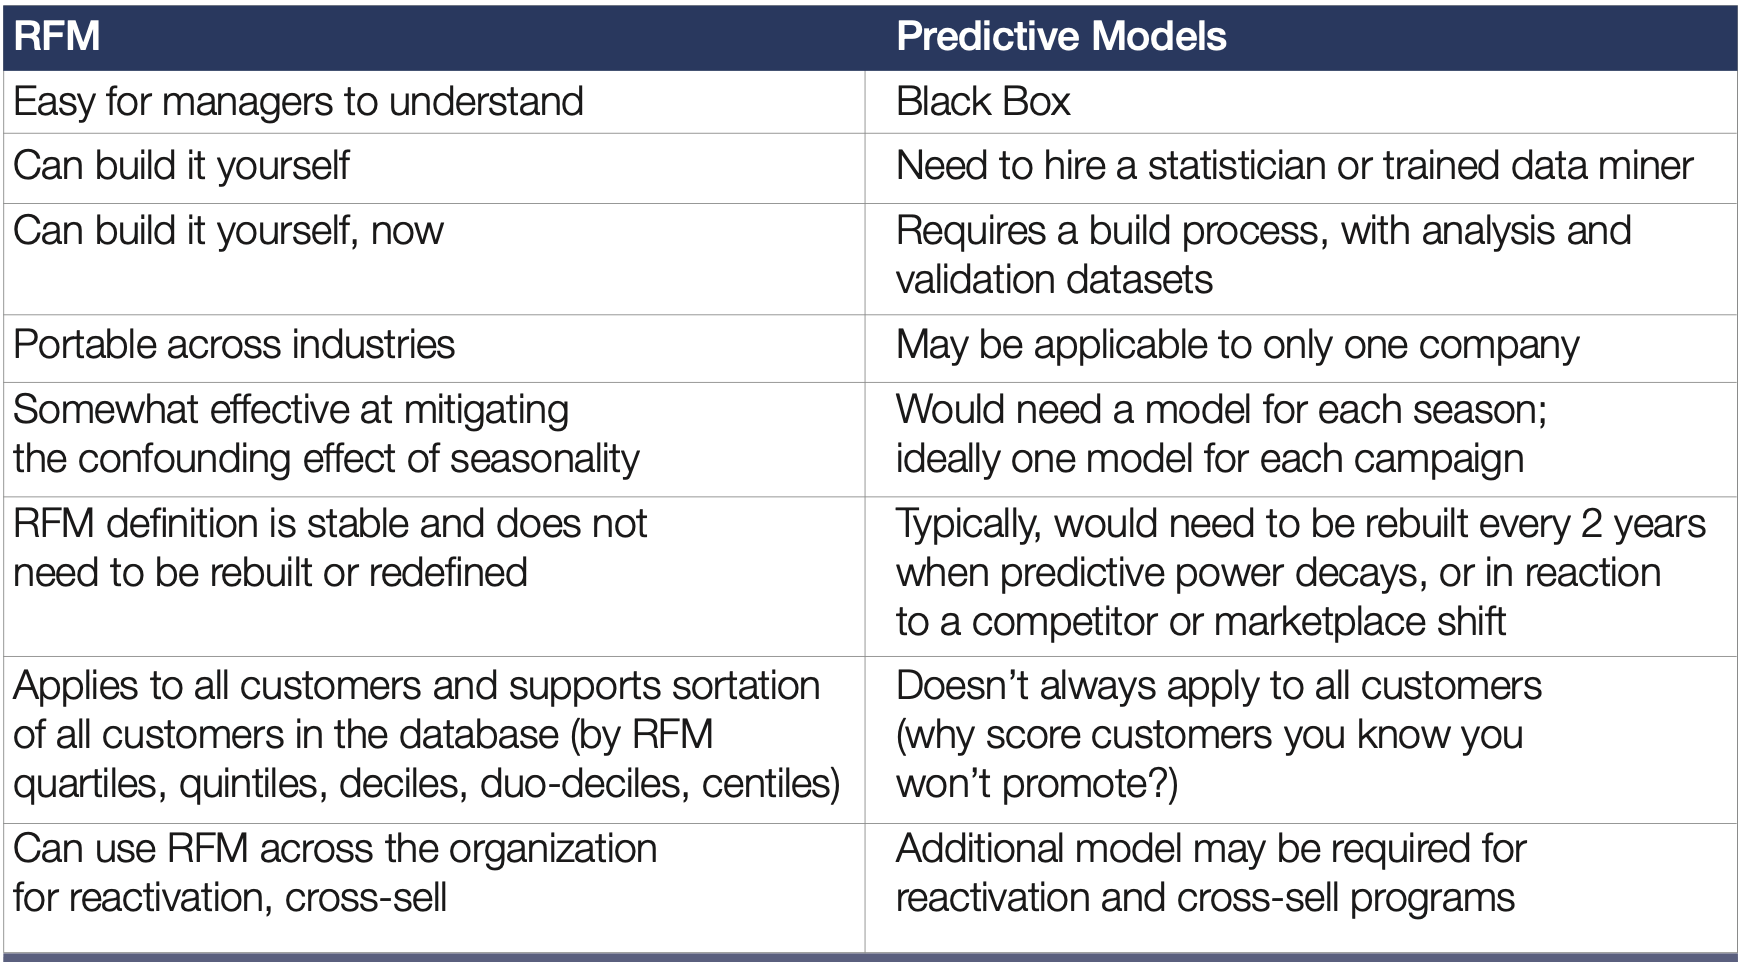



Choose to use both predictive models and RFM side by side. My rationale is that predictive models do a superior job of predicting sales and my first priority is to make money. Predictive Models have a better return on investment than segmentations based on RFM.

However, RFM is applicable when modeling isn’t practical. For example, perhaps your database is too small to warrant the investment in building the model. The fees for building predictive models can run in the tens of thousands, while RFM is essentially a do-it-yourself proposition; and, as a result, much cheaper. Finally, building a model takes time, especially since you need to go back in time, build a regression equation on a group of customers, validate the result on an equivalent group, implement the model by scoring today’s database, and then pull the trigger. RFM values, by contrast, can be applied to your database by the time you get to the end of this paper.

My favorite role for RFM is as a management tool. By predictor variables, models gain predictive power, but lose the ability to explain the reasons why it works. This is a black box for management, as well as a missed opportunity to understand the key business drivers of the dependent variable (response, sales per campaign, loyalty). It’s true; there have been admirable steps forward in pairing up Regression models for predictive power with Principal Component Analysis and tree- analyses to explain its building blocks. However, these are additional investments in themselves that require time and money. My suggestion is to use RFM for understanding, in concert with predictive models for campaign execution.

### How to Build RFM Model for Analysis?

Steps in building an RFM model:
- Remove outliers, fraud, employees, suppressions, opt-outs 
- Decide how you will treat non-buyers
- Build the model, QC a handful of records
- Create a RFM score for each customer on the database
- Rank the entire database on this RFM score
- Divide into equal groups (deciles, duo-deciles, centiles) 
- Repeat after each update

接下来使用来自于[Great Learning](https://olympus.mygreatlearning.com/courses/11105/files/1640927?module_item_id=852194)网站的数据集用于演示如何进行RFM Analysis.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

%matplotlib inline
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [8]:
# read the data for RFM analysis
data = pd.read_excel("/Users/ray/Desktop/data_science_interview/statistics/RFM Analysis/Online+Retail-1.xlsx")
display(data.head(5))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
1,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom
2,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
3,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom
4,560040,23343,came coded as 20713,3100,2011-07-14 14:28:00,0.00,NaN,United Kingdom


首先，对数据集进行sanity check.

In [10]:
print(data.shape)

(531278, 8)


In [9]:
# check whether each variable has missing values
display(data.apply(lambda col:sum(col.isnull())))

InvoiceNo           0
StockCode           0
Description       591
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133359
Country             0
dtype: int64

`customer_id`有大量的缺失值。通常我们会用均值或者众数填充缺失值，但是`customer_id`是用来识别每个顾客信息的变量，不具备实际意义。所以直接删除缺失值。

`Description`是对产品的描述。RFM分析不需要使用到该变量，将缺失的记录删除。

In [72]:
# drop customer_id from dataset
data_drop = data.dropna(axis=0)

In [73]:
data_drop.describe(datetime_is_numeric=True)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397919.000000,397919,397919.000000,397919.000000
mean,12.577550,2011-07-10 23:42:57.938776832,3.116203,15294.336249
min,1.000000,2010-12-01 08:26:00,0.000000,12347.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,3906.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,41.661546,NaN,22.096925,1713.162624


**Step 1: Calculate Recency, Frequency, and Monetary**

- Recency = Current Date - Max Purchase Date
- Frequency = Count(CustomerID)
- Monetary = Sum(Quantity$\times$Quanitity) for each customer

***Note: Here we assume current date is 2011-12-31***

In [74]:
from datetime import datetime

invoice_dt = pd.to_datetime(data_drop.InvoiceDate).dt.date
# then find the maximum date for each customer
data_drop["invoice_dt"] = invoice_dt
data_drop["current_dt"] = cur_dt
data_drop.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice_dt,current_dt
0,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom,2011-02-22,2011-12-31
1,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom,2011-07-19,2011-12-31
2,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom,2011-01-11,2011-12-31
3,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom,2011-04-18,2011-12-31
6,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308.0,United Kingdom,2011-11-02,2011-12-31


In [115]:
# calculate the three metrics

rfm_df = data_drop.groupby("CustomerID").agg({"invoice_dt":"max",'InvoiceNo':'count'})

# calculate the Recency: current date - max_invoice_date
rfm_df["invoice_dt"] = pd.to_datetime(rfm_df.invoice_dt)
cur_dt = datetime(2011,12,31)
rfm_df['cur_dt'] = cur_dt
rfm_df["Recency"] = (rfm_df.cur_dt - rfm_df.invoice_dt).dt.days

# calculate the Monetary
data_drop['Revenue'] = data_drop.UnitPrice*data_drop.Quantity
rfm_m = data_drop.groupby("CustomerID").agg({"Revenue":'sum'})

rfm_df = pd.merge(rfm_df,rfm_m,left_index=True,right_index=True,how="inner").rename(columns={"InvoiceNo":"Frequency",
                                                                           "Revenue":"Monetary"})

# 将三个指标结果提取存入一个数据框
rfm_df = rfm_df[["Recency","Frequency","Monetary"]]
display(rfm_df.head())

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,24,182,4310.00
12348.0,97,31,1797.24
12349.0,40,73,1757.55
12350.0,332,17,334.40
12352.0,58,85,2506.04


**Step 2: Rank customers based on the three metrics and Calculate Final RFM Score**

首先根据用户的Recency, Frequency和Monetary三个指标进行排序，并且根据顺序计算得分。例如，以Recency排序，时间越近的排在首位，然后我们给排在前20%的用户赋值5分，排在20%-40%的赋值4分，以此类推。

其次，计算最终的RFM总分时，我们需要根据场景的不同设定每个指标的权重，在计算最终总分：

- 对于耐用消费品行业，如汽车、房产、和大型家电等，消费者不可能频繁购买产品，所以Monetary的权重应该最大，而R和F的全中国应该偏小。
- 对于零售行业，例如软饮料、食物、化妆品等，消费者用完商品就会有替换/更新需求，因此消费的频率会很高。而零售行业的商品价格相比较低，所以我们可以给予R和F更高的权重。

In [144]:
recency = rfm_df["Recency"].sort_values(ascending=True)
frequency = rfm_df["Frequency"].sort_values(ascending=True)
monetary = rfm_df["Monetary"].sort_values(ascending=True)

r_scores = pd.qcut(recency,q=5,labels=np.arange(5,0,-1))
f_scores = pd.qcut(frequency,q=5,labels=np.arange(1,6))
m_scores = pd.qcut(monetary,q=5,labels=np.arange(1,6))

rfm_res = pd.merge(r_scores,f_scores,left_index=True,right_index=True).merge(m_scores,left_index=True,right_index=True)

# 构造一列显示每个用户的RFM
rfm_res["RFM"] = rfm_res.Recency.astype("str") + "," + rfm_res.Frequency.astype("str") + "," + rfm_res.Monetary.astype("str")

# 计算每个顾客的RFM总分， RFM Score = (recency+frequency+monetary)/3
rfm_res["RFM_Score"] = (rfm_res.Recency.astype("int") + rfm_res.Frequency.astype("int") + rfm_res.Monetary.astype("int"))/3
rfm_res["RFM_Score"] = rfm_res["RFM_Score"].apply(lambda x:round(x,1))
rfm_res.head(5)

,Recency,Frequency,Monetary,RFM,RFM_Score
CustomerID,,,,,
14051.0,5,5,5,"5,5,5",5.0
12985.0,5,4,4,"5,4,4",4.3
16954.0,5,3,5,"5,3,5",4.3
12748.0,5,5,5,"5,5,5",5.0
18102.0,5,5,5,"5,5,5",5.0


现在，我们需要根据这三个指标来将用户进行分层。通常用户可以被分为：

- **冠军（Champions）** 是你的最佳客户，他们最近、最频繁、最大手笔的购买商品，他们正是你的重度消费者。奖励这些客户。他们可以成为新产品的早期接受者，并能够帮助宣传你的品牌。

- **潜在的忠实拥护者（Potential Loyalist）** 是近期客户，他们的平均购买频率很高，并且消费金额很高。提供会员或忠诚度计划或向他们推销和原产品类似但更高级的产品去帮助他们成为你的效忠者和拥护者。


- **新客户（New Customers）** 是那些RFM总体得分较高，但不常购物。通过在用户引导（user onboarding）这一步给予他们更多的帮助，以及给他们提供优惠和促销，可以增加他们的访问量，并开始与这些客户建立关系。

- **处于风险中的客户（At Risk Customers）** 是经常购买，消费金额大但最近却没有购买的客户。向他们发送个性化的重激活广告和他们重新建立连接，并提供相关产品/服务来鼓励他们再次购买。

- **不能失去的客户（Can't Lost Them）** 是那些曾经经常光顾和购买但最近没有光顾的顾客。我们可以通过相关的促销活动将他们带回来，进行调查以找出问题所在，这也是为了避免将其输给竞争对手。

In [160]:
def get_segments(ser):
    r = ser.loc["Recency"]
    f = ser.loc["Frequency"]
    m = ser.loc["Monetary"]
    if (r >= 4 and r <= 5) and (f >= 4 and f <= 5) and (m >= 4 and m <= 5):
        return "Champions"
    elif (r >= 2 and r <= 5) and (f >= 3 and f <= 5) and (m >= 3 and m <= 5):
        return "Loyal Customers"
    elif (r >= 3 and r <= 5) and (f >= 1 and f <= 3) and (m >= 1 and m <= 3):
        return "Potential Loyalist"
    elif (r >= 4 and r <= 5) and (f == 1) and (m == 1):
        return "Recent Customers"
    elif (r >= 3 and r <= 4) and (f == 1) and (m == 1):
        return "Promising Customers"
    elif (r >= 2 and r <= 3) and (f >= 2 and f <= 3) and (m >= 2 and m <= 3):
        return "Customers needing Attention"
    elif (r >= 2 and r <= 3) and (f >= 1 and f <= 2) and (m >= 1 and m <= 2):
        return "About to Sleep"
    elif (r >= 1 and r <= 2) and (f >= 2 and f <= 5) and (m >= 2 and m <= 5):
        return "At Risk"
    elif (r == 1) and (f >= 4 and f <= 5) and (m >= 4 and m <= 5):
        return "Can't Loose them"
    elif (r >= 1 and r <= 2) and (f >= 1 and f <= 2) and (m >= 1 and m <= 2):
        return "Hibernating"
    elif (r == 1) and (f >= 1 and f <= 2) and (m >= 1 and m <= 2):
        return "Hibernating"
    else:
        return "Customers needing Attention"

In [162]:
rfm_res['segments'] = rfm_res.iloc[:,:3].apply(lambda row:get_segments(row),axis=1)
display(rfm_res.head(5))

,Recency,Frequency,Monetary,RFM,RFM_Score,segments
CustomerID,,,,,,
14051.0,5,5,5,"5,5,5",5.0,Champions
12985.0,5,4,4,"5,4,4",4.3,Champions
16954.0,5,3,5,"5,3,5",4.3,Loyal Customers
12748.0,5,5,5,"5,5,5",5.0,Champions
18102.0,5,5,5,"5,5,5",5.0,Champions


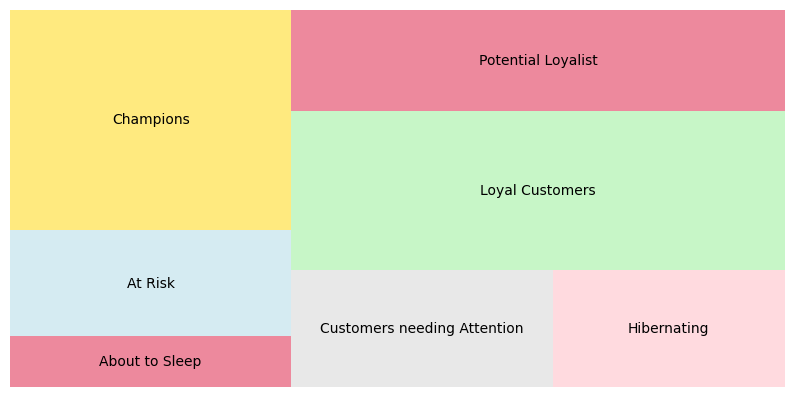

In [214]:
import squarify
import matplotlib
# 计算每一个segment的顾客数量
segment_df = rfm_res.reset_index().groupby("segments",as_index=False).agg({"CustomerID":"count"})
segment_df.columns = ["segments","count"]


# 绘制树状图
fig,ax = plt.subplots(1,1,figsize=(10,5),dpi=100)
squarify.plot(sizes=segment_df['count'], label=segment_df['segments'],color=["crimson","lightblue","gold",
                                                                            "lightgrey","lightpink",'lightgreen'],alpha=.5,ax=ax)
plt.axis('off')
plt.show()